<a href="https://colab.research.google.com/github/Abhinagit24/data_analytics_2/blob/main/Python/Unit3_Python_Advanced_Pandas_DataWrangling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [53]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
#define dataset
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [ ]:
#first five rows of df
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [68]:
#last five rows of df
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [ ]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [55]:
# Mean of all salaries
df.mean()

Unnamed: 0          199.000000
yrs.since.phd        22.314861
yrs.service          17.614610
salary           113706.458438
dtype: float64

In [56]:
# Median of all salaries
df.median()

Unnamed: 0          199.0
yrs.since.phd        21.0
yrs.service          16.0
salary           107300.0
dtype: float64

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [57]:
#a new Data Frame that only has the columns 'sex' and 'salary'
dfnew = df[["sex","salary"]]

In [ ]:
dfnew

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500
...,...,...
392,Male,103106
393,Male,150564
394,Male,101738
395,Male,95329


Finding the Median salary for all males

In [58]:
#a new Data Frame that only has the columns 'sex' and 'salary' and the rows where 'sex' == 'male'
dfmale = dfnew['sex'] == 'Male'

In [62]:
dfnew[dfmale]

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500
...,...,...
392,Male,103106
393,Male,150564
394,Male,101738
395,Male,95329


In [61]:
#No of males in the data
dfnew[dfmale].count()

sex       358
salary    358
dtype: int64

In [65]:
dfnew[dfmale].max()

sex         Male
salary    231545
dtype: object

In [59]:
dfmale.count()

397

In [ ]:
print("The median salary for all males is ",dfnew[dfmale].loc[:,"salary"].median())

The median salary for all males is  108043.0


Finding the Median salary for all females

In [ ]:
#a new Data Frame that only has the columns 'sex' and 'salary' and the rows where 'sex' == 'female'
dffemale = dfnew['sex'] == 'Female'


In [63]:
dfnew[dffemale]

,sex,salary
9,Female,129000
19,Female,137000
24,Female,74830
34,Female,80225
35,Female,77000
47,Female,151768
48,Female,140096
52,Female,74692
63,Female,103613
68,Female,111512


In [64]:
#No of females in the data
dfnew[dffemale].count()

sex       39
salary    39
dtype: int64

In [67]:
dfnew[dffemale].max()

sex       Female
salary    161101
dtype: object

In [ ]:
print("The median salary for all females is ",dfnew[dffemale].loc[:,"salary"].median())

The median salary for all females is  103750.0


Comparing the Mean salary of Males and Females

In [ ]:
mean_sal_for_male = dfnew[dfmale].loc[:,"salary"].mean()
print("The mean salary for all males is ",mean_sal_for_male)

The mean salary for all males is  115090.41899441341


In [ ]:
mean_sal_for_female = dfnew[dffemale].loc[:,"salary"].mean()
print("The mean salary for all females is ",mean_sal_for_female)

The mean salary for all females is  101002.41025641025


In [ ]:
# The difference between mean salaries of male and female
sal_gap = mean_sal_for_male - mean_sal_for_female
print("The mean salary of males is greater than females by " ,sal_gap)

The mean salary of males is greater than females by  14088.008738003162


# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [ ]:
#A new data set with 'yrs of service' and 'salary' only
df_exp = df[["yrs.service","salary"]]
df_exp

,yrs.service,salary
0,18,139750
1,16,173200
2,3,79750
3,39,115000
4,41,141500
...,...,...
392,30,103106
393,19,150564
394,25,101738
395,15,95329


In [ ]:
#A new data set with 'yrs of service' of more than or equal to 20 and 'salary'
df_exp20 = df_exp[df_exp['yrs.service'] >= 20]
df_exp20

,yrs.service,salary
3,39,115000
4,41,141500
6,23,175000
7,45,147765
8,20,119250
...,...,...
384,21,125192
386,27,139219
388,36,119450
392,30,103106


In [ ]:
print("There are",df_exp20['yrs.service'].count(),"people with 20 years of experience")
print("The mean salary of the people with 20 yrs of experience is",df_exp20['salary'].mean())

There are 157 people with 20 years of experience
The mean salary of the people with 20 yrs of experience is 122520.65605095541


Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [ ]:
#A new data set with 'yrs of service' less than 20 yrs only
df_expnot20 = df_exp[df_exp['yrs.service'] < 20]
mean_sal20 = df_exp20['salary'].mean()
mean_salnot20 = df_expnot20['salary'].mean()

In [ ]:
print("The mean salary of the people with 20 yrs of experience is",mean_sal20," while the salary of the people with less than 20 yrs of experience is",mean_salnot20)

The mean salary of the people with 20 yrs of experience is 122520.65605095541  while the salary of the people with less than 20 yrs of experience is 107940.50416666667


In [ ]:
sal_gap20 = mean_sal20 - mean_salnot20
print("The mean salary of the people with 20 yrs of experience is greater than the people with less than 20 yrs of experience by " ,sal_gap20)

The mean salary of the people with 20 yrs of experience is greater than the people with less than 20 yrs of experience by  14580.151884288745


People who have salary of greater than or equal to 200,000

In [ ]:
#A new data set with rows of people with salary greater than or equal to 200,000
df_sal200k = df[df['salary'] >= 200000]
df_sal200k

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
43,44,Prof,B,38,38,Male,231545
249,250,Prof,A,29,7,Male,204000
364,365,Prof,A,43,43,Male,205500


In [ ]:
print("There are",df_sal200k['salary'].count(),"people with a salary of 200,000 or greater")
print("The mean salary of the people with 20 yrs of experience is",df_sal200k['salary'].mean())

There are 3 people with a salary of 200,000 or greater
The mean salary of the people with 20 yrs of experience is 213681.66666666666


There are 3 people with a salary of 200,000 or greater
The mean salary of the people with 20 yrs of experience is 213681.66666666666


# Rename values, subset columns, etc

In [72]:
#Renaming the columns: 'Unnamed:0','rank','yrs.service' as 'index','position',and 'service yrs'
df = df.rename(columns={'Unnamed: 0':'index','rank':'position','yrs.service':'service yrs'})
df

,index,position,discipline,yrs.since.phd,service yrs,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


In [ ]:
#dropping some columns
columns_to_be_dropped = ['index','position','discipline','yrs.since.phd','service yrs']
df1 = df.drop(columns_to_be_dropped, axis=1)
df1


,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500
...,...,...
392,Male,103106
393,Male,150564
394,Male,101738
395,Male,95329


# Create some simple visualizations showing some simple statistics

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7230e3bb00>,
      dtype=object)

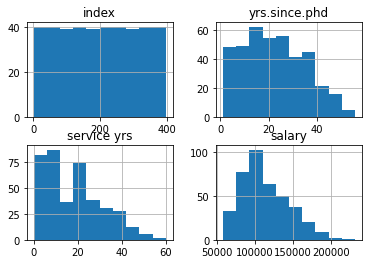

In [ ]:
df.hist()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


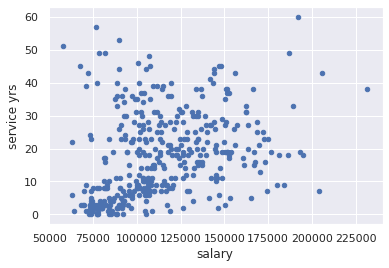

In [78]:
#scatter plot for salary Vs service yrs
df.plot(kind='scatter',x='salary',y='service yrs')

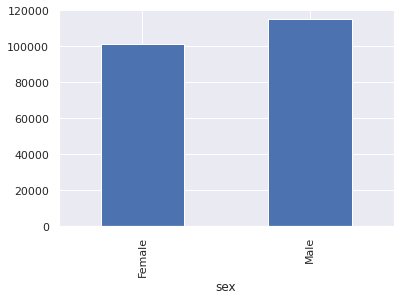

In [70]:
#bar graph for male Vs female mean salary
df.groupby(['sex'])['salary'].mean().sort_values(ascending=True).plot(kind='bar')

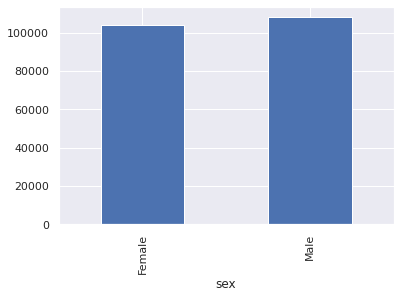

In [ ]:
#bar graph for male Vs female median salary
df.groupby(['sex'])['salary'].median().sort_values(ascending=True).plot(kind='bar')

Your observations from the visuals: 

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

By looking at the histogram for 'yrs.since.phd', it is clear that most of the people have taken their phd less than 40 years ago and within this range most people have their phd less than 20 years ago. The plot for 'service yrs' shows that most of the people have been working for less than 20 years. By looking at the plot for 'salary', most of the people get their salary around 100,000 dollars.

By plotting the scatter plot for 'salary' vs 'service yrs', the density is high at the range of 'salary'- 75,000-100,000 and 'service yrs' below 10 years, showing most people have this range of salary and they don't have much experience. The plot shows a regular trend of higher salary with more years of experience, but there are some people as exceptions. There are a few people with less than 20 years of experience but still getting a salary of around 200,000 dollars. There are also some with 50 years of experience but still getting a salary around 75,000 dollars.

By looking at the plot of mean value of salary of males Vs females, females are getting a mean salary lower than that of males. But when the median value of salaries is compared, the salary gap between the two sexes is low. This indicates that the relatively low meean for female staff is because the number of females is only 39 whereas the number of male staff is 358. By looking at the maximum salary, male max salary is 231,545 whereas female max salary is 161,101. By looking at these values, we can say that there is a salary disparity but as the number of females is far lesser than that of males, the data is insufficient to be provided as the proof for salary disparity found. 
